In [12]:
import lyse
import matplotlib.pyplot as plt
%matplotlib notebook

In [63]:
# run this after loading data using lyse gui
df = lyse.data()
NA_LOADING_TIME, K_LOADING_TIME = 3.5, 9.0

def make_ncounts_histogram(x_axis_key):
    plt.style.use("seaborn")
    ret = plt.hist(df["zcam_triple_analysis"][x_axis_key])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel("# of shots", fontsize=20)
    plt.xlabel(x_axis_key, fontsize=20)
    
    #mean, stdev analysis
    mean, std = df["zcam_triple_analysis"][x_axis_key].mean(), df["zcam_triple_analysis"][x_axis_key].std()
    title_str = (
        f"total # of shots: {len(df)}" 
        + f"\n mean: {mean:10.0f}"
        + f"\n std: {std:10.0f}, {std/mean * 100:10.0f}% rel. to mean"
        + f"\n Na, K loading (s): {NA_LOADING_TIME}, {K_LOADING_TIME}"
                )
    print(title_str)
    plt.title(title_str, fontsize=20)
    plt.plot([mean-std, mean-std], [0, max(ret[0])], 'k:')
    plt.plot([mean+std, mean+std], [0, max(ret[0])], 'k:')
    
    plt.tight_layout()

# quick-and-dirty check that the right data is loaded
should see a photoassociation spectrum

<IPython.core.display.Javascript object>


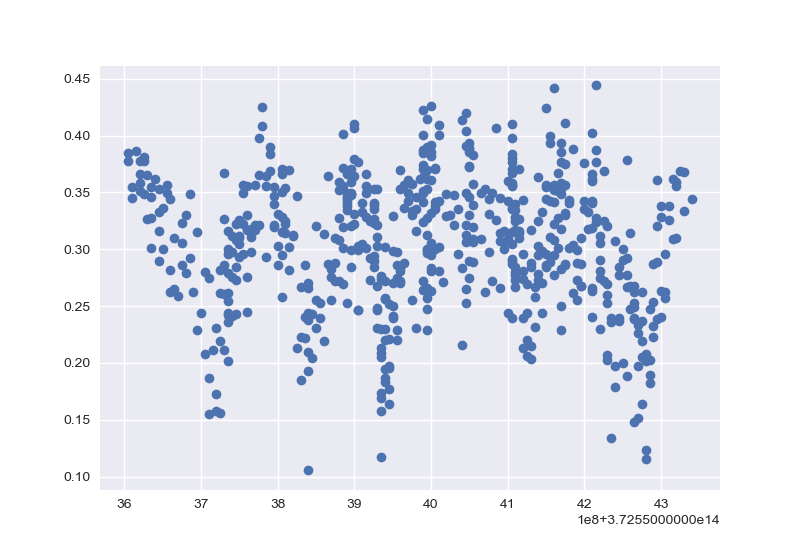

In [58]:
plt.plot(round(df["zcam_triple_analysis"]["UPLEG_FREQUENCY"] * 1e12 / 5e6) * 5e6, df["zcam_triple_analysis"]["K2_transferLarge"], 'o')

<IPython.core.display.Javascript object>


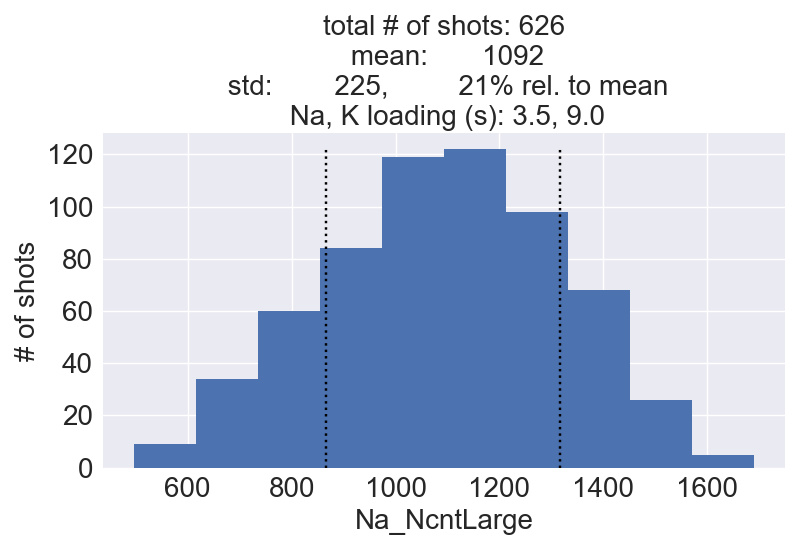

total # of shots: 626
 mean:       1092
 std:        225,         21% rel. to mean
 Na, K loading (s): 3.5, 9.0


In [65]:
make_ncounts_histogram("Na_NcntLarge")

<IPython.core.display.Javascript object>


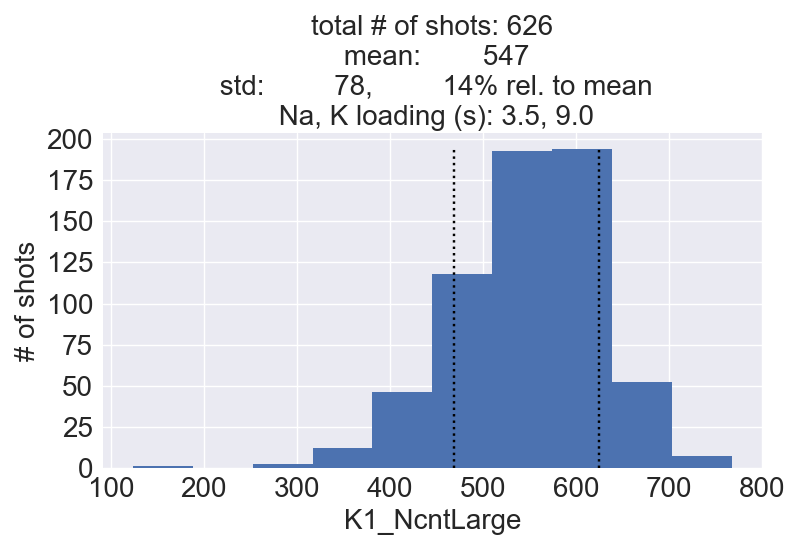

total # of shots: 626
 mean:        547
 std:         78,         14% rel. to mean
 Na, K loading (s): 3.5, 9.0


In [66]:
make_ncounts_histogram("K1_NcntLarge")

In [111]:
import numpy as np

def linear_regression_and_plot(x, y):
    # Drop rows with NaN values in x and y
    non_nan_mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[non_nan_mask]
    y = y[non_nan_mask]
    
    # Calculate the mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate the slope (m) and y-intercept (b) of the regression line
    m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - m * x_mean
    
    # Plot the original data points
    plt.plot(x, y, 'o', alpha=0.5)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Plot the regression line
    regression_line = m * x + b
    plt.plot(x, regression_line, color='red', label=f'Regression Line: \n y = {m:.2f}x + {b:.2f}')
    plt.legend(fontsize=20)
    
    return m, b

def make_regression_plot(x_key, y_key):
    x_data, y_data = df["zcam_triple_analysis"][x_key], df["zcam_triple_analysis"][y_key]
    linear_regression_and_plot(x_data, y_data)
    plt.xlabel(x_key, fontsize=20)
    plt.ylabel(y_key, fontsize=20)
    plt.tight_layout()

# Looking for correlations in atom loading

We see a slight anti-correlation trend, i.e. more Na correlates with less K mF=-7/2.


There are few possible interpretations:
- During the joint loading of Na and K, they kill each other in an earlier stage.
- More Na lowers the fidelity of the Landau-Zener preparation of mF=-7/2 from mF=-9/2, immediately before the rf Feshbach association pulse.
- More Na leads to more efficient formation of Feshbach molecules, thereby depleting the K mF=-7/2 population.

<IPython.core.display.Javascript object>


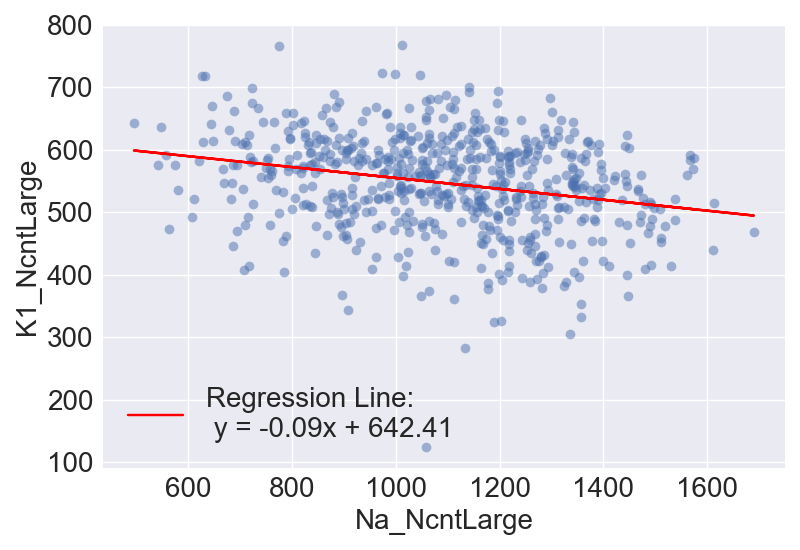

In [116]:
x_key, y_key = "Na_NcntLarge", "K1_NcntLarge"
make_regression_plot(x_key, y_key)